#📌 Extracción

In [117]:
#Importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#extacion de del .json

import json
from pandas import json_normalize

df= pd.read_json ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
print (df)


      customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'Phone

In [119]:
#normalizacion de j.son

json_normalize(df)

#normalizacion datos
datos_client = pd.concat([df.drop(['customer'], axis=1), df['customer'].apply(pd.Series),df.drop(['phone'], axis=1), df['phone'].apply(pd.Series),df.drop(['internet'], axis=1), df['internet'].apply(pd.Series)], axis=1)
datos_client.head()

datos_secundarios=pd.concat([df['customerID'],df['Churn']],axis=1)


data_cuenta=pd.json_normalize(df['account'])





#🔧 Transformación

In [120]:
#transformacion datos cliente
datos_client['Partner'] = datos_client['Partner'].map({'Yes': 1, 'No': 0})
datos_client['Dependents'] = datos_client['Dependents'].map({'Yes': 1, 'No': 0})

#transformacion  de datos Phone
datos_client['MultipleLines'].unique()

phone_data = ['PhoneService', 'MultipleLines']
datos_client[phone_data] = datos_client[phone_data].replace({'Yes': 1, 'No': 0, 'No phone service': 0})

#transforma de datos internet
internet_data = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
unique_values = pd.unique(datos_client[internet_data].values.ravel())

#transforma de datos cuenta

vacios = data_cuenta['Charges.Total'].str.strip().eq('').sum()
vacios






/tmp/ipython-input-3471118020.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_client[phone_data] = datos_client[phone_data].replace({'Yes': 1, 'No': 0, 'No phone service': 0})


np.int64(11)

In [121]:
data_cuenta['Cuentas_Diarias'] = data_cuenta['Charges.Monthly'] / 30.44
data_cuenta['Cuentas_Diarias'] = data_cuenta['Cuentas_Diarias'].round(2)


In [122]:
cuenta_tras = ['Contract', 'PaperlessBilling', 'PaymentMethod']
unique_values_cuenta = pd.unique(data_cuenta[cuenta_tras].values.ravel())

data_cuenta['PaperlessBilling'] = pd.to_numeric(data_cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),errors='coerce').fillna(0).astype(int)

/tmp/ipython-input-2842834996.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cuenta['PaperlessBilling'] = pd.to_numeric(data_cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),errors='coerce').fillna(0).astype(int)


In [123]:
data_cuenta['Charges.Total'] = (
    data_cuenta['Charges.Total']
    .astype(str)  # Asegura que los valores sean strings antes del replace
    .str.replace(r'[$,]', '', regex=True)  # Quita símbolos de dólar y comas
)

data_cuenta['Charges.Total'] = pd.to_numeric(
    data_cuenta['Charges.Total'], errors='coerce'
).fillna(0)


In [124]:

cantidad_vacios = datos_secundarios['Churn'].str.strip().eq('').sum()
cantidad_vacios


np.int64(224)

In [125]:
pd.unique(datos_secundarios['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [127]:
datos_secundarios['Churn'] = pd.to_numeric(
    datos_secundarios['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

#📊 Carga y análisis

In [128]:

df_final = pd.concat([datos_client,datos_secundarios,data_cuenta], axis=1)

df_final.describe()



,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Churn,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.257190,0.593230,64.720098,2277.182035,2.126155
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.437115,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [129]:
df_final.to_csv('df_final.csv', index=False)



In [133]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]





In [134]:
churn_counts = df_final['Churn'].value_counts()

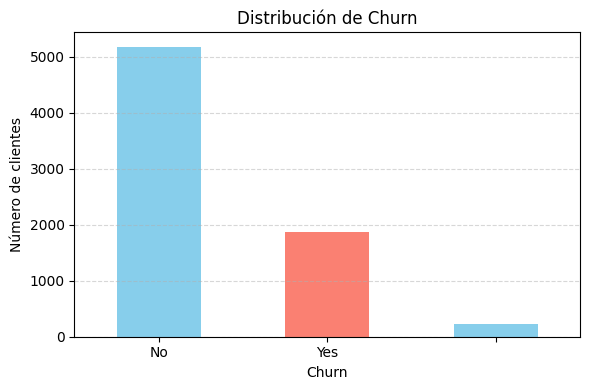

In [135]:
# Crear gráfico de barras
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Agregar títulos y etiquetas
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()

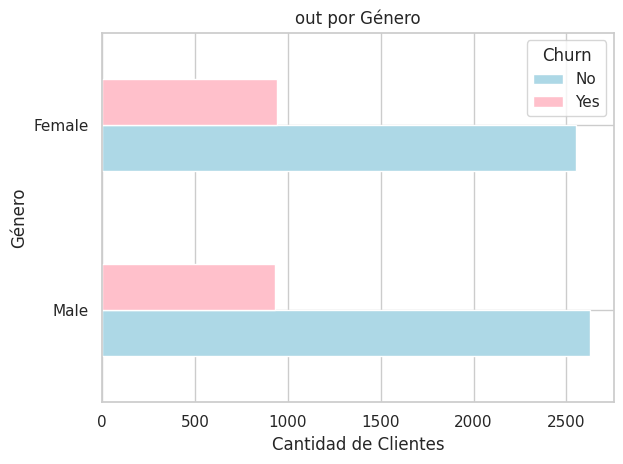

In [142]:
hombres = df_final[df_final['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_final[df_final['gender'] == 'Female']['Churn'].value_counts()

# Crea un  DataFrame combinado
data = pd.DataFrame({
    'Male': hombres,
    'Female': mujeres
}).T

# Ordena columnas por 'No' y 'Yes' si existen
if 'No' in data.columns and 'Yes' in data.columns:
    data = data[['No', 'Yes']]

# Grafica barras horizontales
data.plot(kind='barh', stacked=False, color=['lightblue', 'pink'])

# Títulos y etiquetas
plt.title('out por Género')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Género')
plt.legend(title='Churn')
plt.tight_layout()

# Mostrar gráfico
plt.show()


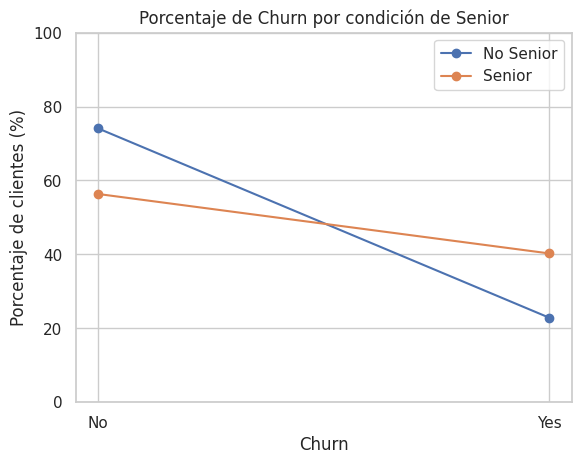

In [143]:
# Cuenta los valores de 'Churn' para cada grupo
no_senior_counts = df_final[df_final['SeniorCitizen'] == 0]['Churn'].value_counts(normalize=True)
senior_counts = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True)

# Reordemna y rellena valores faltantes con 0
churn_labels = ['No', 'Yes']
no_senior_perc = no_senior_counts.reindex(churn_labels, fill_value=0) * 100
senior_perc = senior_counts.reindex(churn_labels, fill_value=0) * 100

# Crear gráfico de líneas con porcentajes
plt.plot(churn_labels, no_senior_perc.values, label='No Senior', marker='o')
plt.plot(churn_labels, senior_perc.values, label='Senior', marker='o')

# Etiquetas y formato
plt.xlabel('Churn')
plt.ylabel('Porcentaje de clientes (%)')
plt.title('Porcentaje de Churn por condición de Senior')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)  # Límite de 0 a 100% en el eje Y

# Mostrar gráfico

plt.show()

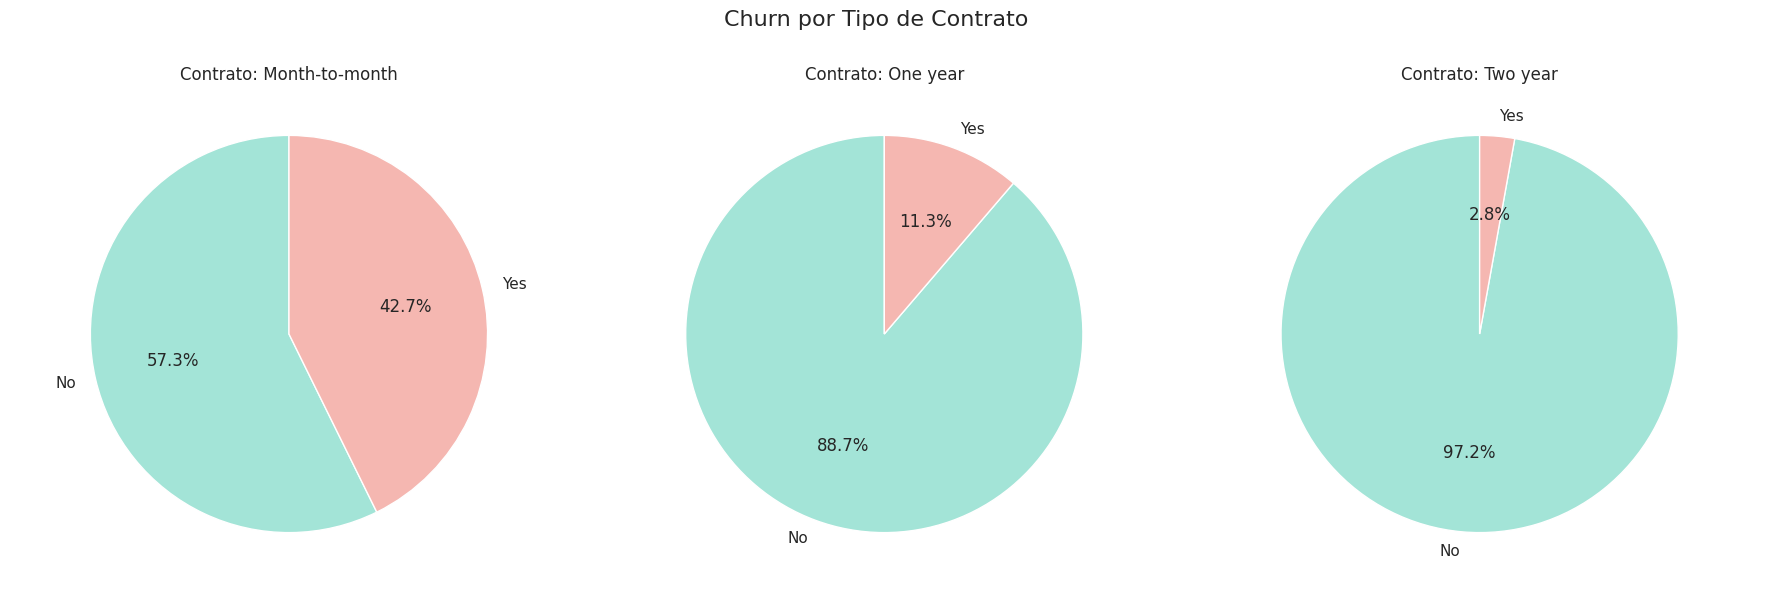

In [147]:
#definde datos unicos
df_final['Contract'].unique()


# Filtrar cada tipo de contrato
contracts = ['Month-to-month', 'One year', 'Two year']
colors = ['#A3E4D7', '#F5B7B1']  # verde suave para "No churn", rojo suave para "Yes churn"

# Crear figura con 3 subplots (uno por tipo de contrato)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, contract in enumerate(contracts):
    # Filtrar por tipo de contrato
    subset = df_final[df_final['Contract'] == contract]

    # Contar Churn dentro de este contrato
    churn_counts = subset['Churn'].value_counts().reindex(['No', 'Yes'], fill_value=0)

    # Pie chart para este contrato
    axes[i].pie(
        churn_counts,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f'Contrato: {contract}')
    axes[i].axis('equal')  # Mantener el círculo perfecto

# Título general
plt.suptitle('Churn por Tipo de Contrato', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Espacio para el título general
plt.show()




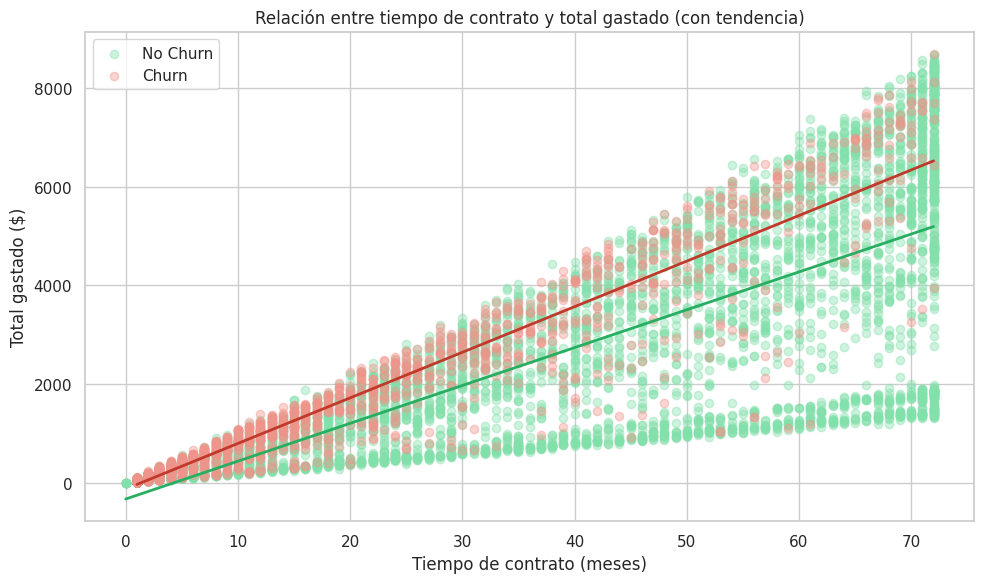

In [154]:
# Filtrar usando 'Yes' y 'No'
df_churn_no = df_final[df_final['Churn'] == 'No'][['tenure', 'Charges.Total']].reset_index(drop=True)
df_churn_yes = df_final[df_final['Churn'] == 'Yes'][['tenure', 'Charges.Total']].reset_index(drop=True)

# Convertir a numpy arrays
tiempo_no = df_churn_no['tenure'].to_numpy()
gasto_no = df_churn_no['Charges.Total'].to_numpy()

tiempo_yes = df_churn_yes['tenure'].to_numpy()
gasto_yes = df_churn_yes['Charges.Total'].to_numpy()

plt.figure(figsize=(10, 6))

# Graficar para 'No'
if len(tiempo_no) > 0 and len(gasto_no) > 0:
    plt.scatter(tiempo_no, gasto_no, alpha=0.4, label='No Churn', color='#82E0AA')
    z_no = np.polyfit(tiempo_no, gasto_no, 1)
    p_no = np.poly1d(z_no)
    x_no_sorted = np.sort(tiempo_no)
    plt.plot(x_no_sorted, p_no(x_no_sorted), color='#27AE60', linewidth=2)

# Graficar para 'Yes'
if len(tiempo_yes) > 0 and len(gasto_yes) > 0:
    plt.scatter(tiempo_yes, gasto_yes, alpha=0.4, label='Churn', color='#F1948A')
    z_yes = np.polyfit(tiempo_yes, gasto_yes, 1)
    p_yes = np.poly1d(z_yes)
    x_yes_sorted = np.sort(tiempo_yes)
    plt.plot(x_yes_sorted, p_yes(x_yes_sorted), color='#C0392B', linewidth=2)

plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Total gastado ($)')
plt.title('Relación entre tiempo de contrato y total gastado (con tendencia)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#📄Informe final

## 🟧Introducción
Como parte del analisis para telecom X , el objetivo principal del proyecto es revisar la cantidad de clientes que desistian (out) y revisar cual era el indice de dada de baja de los clientes

## 🟧Extraccion de la data

El proyecto de Telecom X fue guardado en formato tipo .json, por lo que se extuvo que importar la data para la visualizacion , utilizando el metodo de extracion por el URL.

## 🟧 Normalizacion de la data

El .json estaba estructurado en columnas que venian con informacion dentro de la informacion. Por lo que se genero un df con los datos anidados, luego se noramalizaron por serapado datos secundarios y data numerica.

# ⬜ Desarollo de codigo.

En este apartado, se tuvo que eliminar duplicados , definidiendo cada celda como Unique , concatenados y limpieza de data profunda. Se presentaron ciertos errores al ejecutar codigo en mismos espacios de codigo por lo que separe codigos en dife0rentes lineas.

▶graficas generales

Se ejecuto la ionformacion para primero presentar la cantidad de clientes que estaban desisistiendo o saliendo. Se muestra una cantidad importante en la salida (Barra roja)

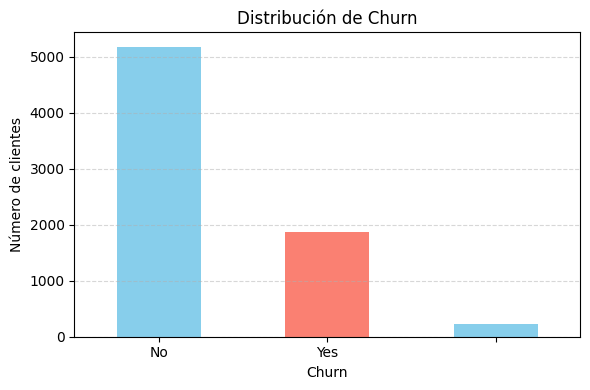

Adicional se hizo el analisis de la cantidad de personas separando por genero

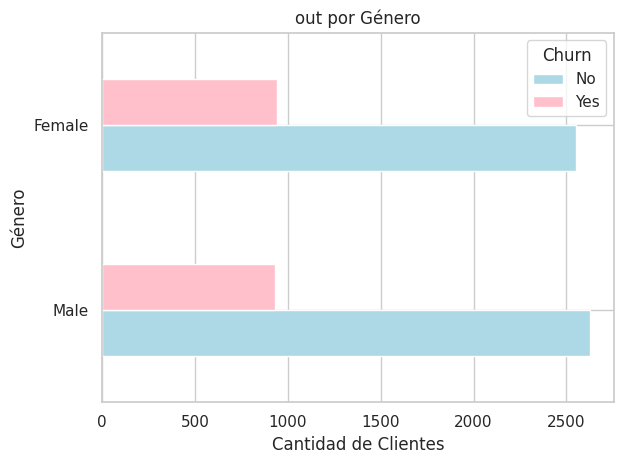

Dando una cantidad muy parecida de mujeres y hombres que estaban desistiendo. Por lo que se descarta una posibilidad de que sea algo generalmente de genero.

se genero una grafica para identificar otro factor de las personas ( la edad) para descartar o identificar si habia factor de edad.

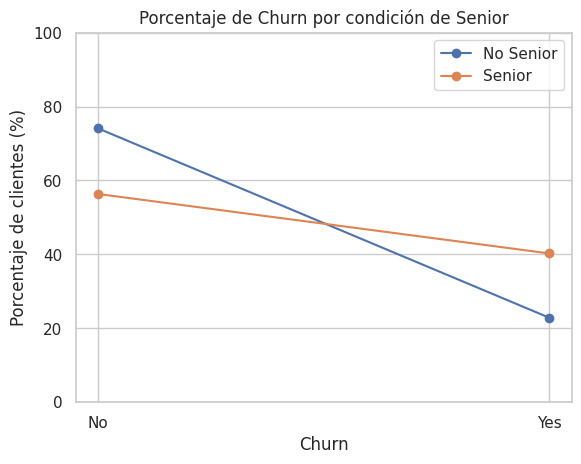



▶ graficas analiticas de Out

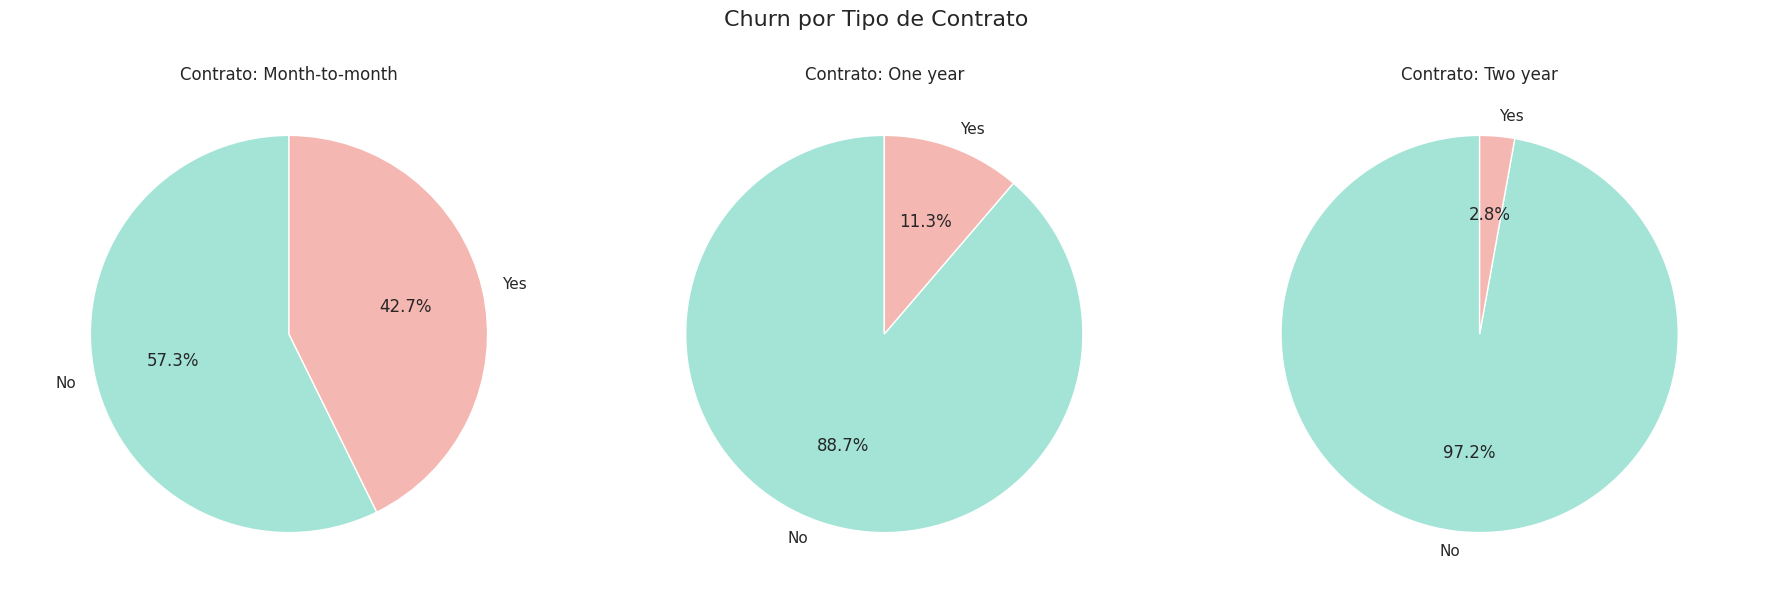

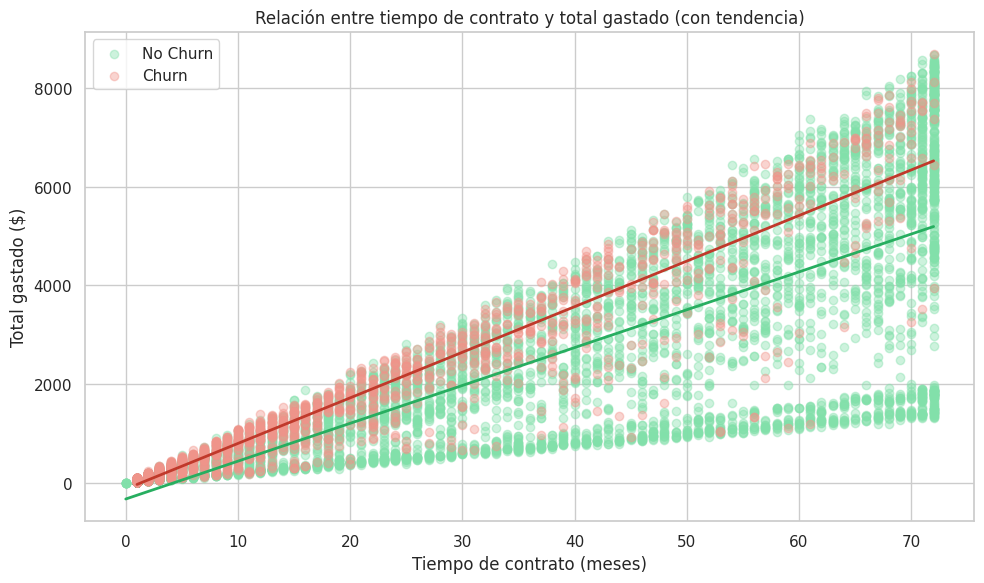




En estas graficas anteriores se hizo el analisis de cuantas personas estaban saliendo en el mes , primer año y Segundo año. Si ven es cierto el porcentaje para los dos años no es significativo, si se ve un problema elevado en mes a mes , que si no se controla se puede generar una salida bastante elevada afectando la economia.

Tal como se ve en el grafico del mes, la salida representa el 42% , esta muy cerca del el 50%. El cual se demuestra el problema de Telecom X.

en la grafica final se muestra la tendencia de salida de los clientes en los ultimos meses. Demostrando que existe cierta tendencia de salida en los primeros dos meses, por lo que puede venir de ahi el problema.






---


# 📖 Posibles problemas

1.   el cliente en los primeros meses se presenta disconforme con el contrato por lo que desiste, posiblemente no hay seguimiento debido del cliente sobre la satisfacion del producto adquirido
2.   El flujo de salida puede deberse a un factor ecomonico o social , sobre el precio final , asumiendo que no existan ofertas.
3. el producto presentado no es el real , por lo que los clientes identificar el problema
4. la tendencia de personas jovenes que desisten del producto es elevada a comparañion a las personas "Senior" por lo que puede a ver un factor de edad o poder adquisitivo que este mostando esta tendencia.

# 📖 Posibles Soluciones.


1.   dar un seguimiento adecuado, capacitando al personal de ventas para dar mas visibilidad del producto y control
2.   las ofertas son impresindibles para capturar al cliente , mas no son los motivos por lo que se puedan quedar, por lo que estas ofertas deben de actualizar para hacer llamativo el producto a los clientes ya consolidados.
3. Comparar con los competidores de manera efectiva para indentificar riesgos de mercado asi como problemas con el producto ofrecido. A veces ver hacia afuera ayuda a mejorar.
4. el producto puede presentar sienta tendencia a hacer out o de economia elevada, por lo que puede suponer salidas de personas jovenes por poder adquisitivo o por desadaptacion social. Por lo que es recomentable hacer un estudio de mercado adecuado para definir el publico meta. Definir el punto a donde se quiere llegar y a quien se quiere vender genera una mejor vision y orden de los objetivos







